

**About the Data**

The dataset used for this project is a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

##The dataset is a modified version of the original dataset to perform some extra feature engineering. 
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC) and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

##Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we aim to build a deep learning model that can predict whether or not a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.


**Start with importing all the modules and libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**'lending_club_info.csv' contains the description of all the columns/features of the dataset.**

In [2]:
data_info = pd.read_csv("lending_club_info.csv", index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [3]:
print(data_info.loc['loan_amnt']["Description"])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [4]:
#function to get the feature info

In [5]:
def info(col):
    return data_info.loc[col]["Description"]

In [6]:
info("loan_amnt")

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

## Loading the data

In [7]:
data = pd.read_csv("lending_club_loan_two.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
#396030 entries and 27 columns/Features including target

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [11]:
data.head(2).T

,0,1
loan_amnt,10000.0,8000.0
term,36 months,36 months
int_rate,11.44,11.99
installment,329.48,265.68
grade,B,B
sub_grade,B4,B5
emp_title,Marketing,Credit analyst
emp_length,10+ years,4 years
home_ownership,RENT,MORTGAGE
annual_inc,117000.0,65000.0



# Exploratory Data Analysis

Goal of the analysis is to understand which features are important, view summary statistics, and visualize the data.

----

**Since the goal is to predict loan_status, we will start with looking at the counts of 'Fully paid' and 'Charged off' values in the dataset.**

<Axes: xlabel='loan_status', ylabel='count'>

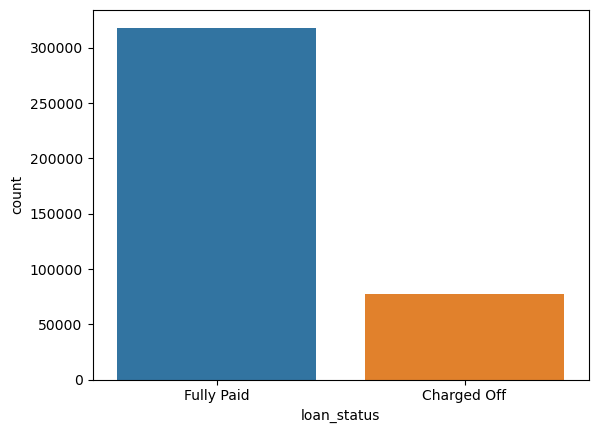

In [12]:
sns.countplot(x="loan_status", data = data)

**Looking at the distribution of loan_amnt.**

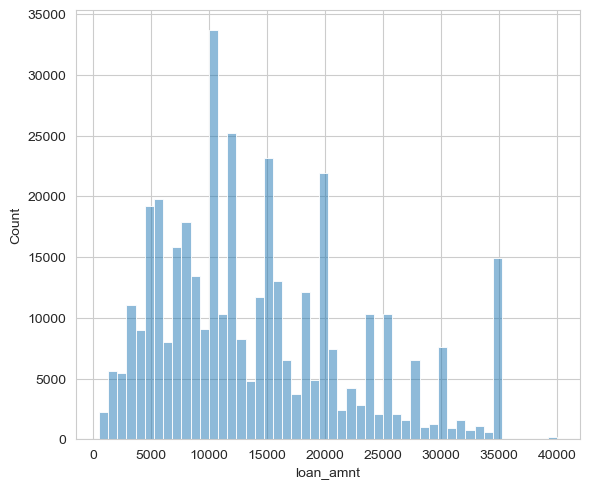

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,5))
sns.histplot(x="loan_amnt", data = data, alpha=0.5, bins = 50)
plt.tight_layout()
plt.show()

**Now let's explore correlation between the numerical features.**

In [14]:
data.select_dtypes(include="object").columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [15]:
data.select_dtypes(include="number").columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
data.corr(numeric_only="bool")

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


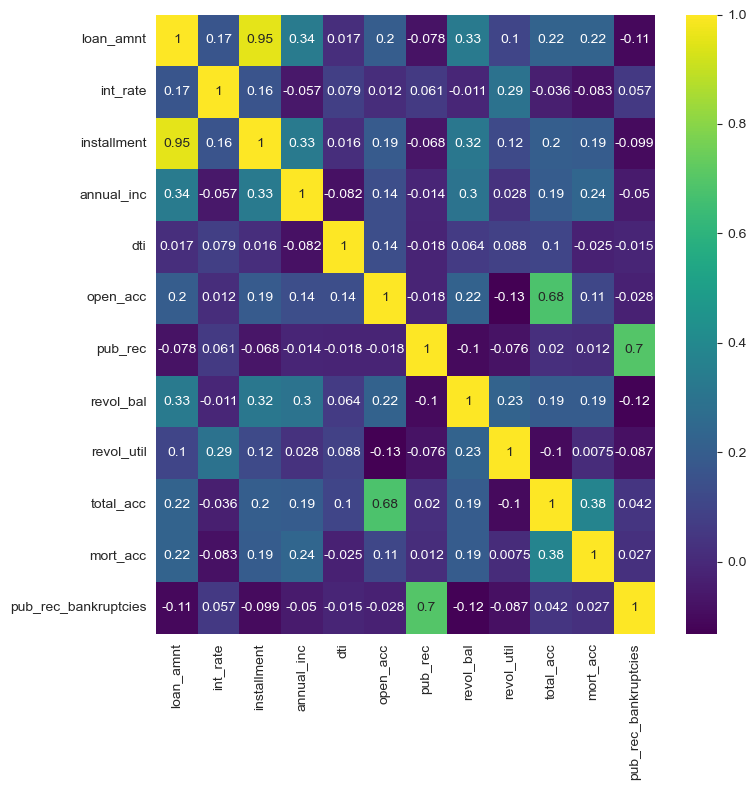

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(numeric_only="bool"),cmap="viridis", annot=True)
plt.tight_layout()
plt.show()

**We can observe almost perfect correlation of 'loan_amt' with the "installment" feature. Lets explore the correlation further using scatterplot.**

In [18]:
info("installment")

'The monthly payment owed by the borrower if the loan originates.'

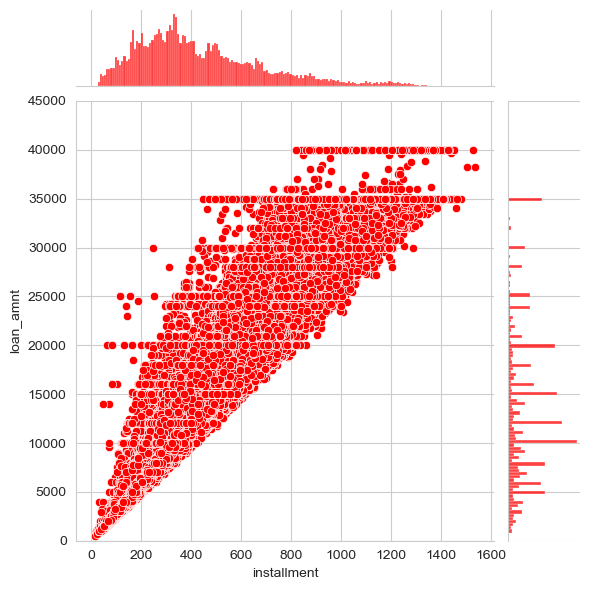

In [19]:
sns.jointplot(x="installment", y="loan_amnt", data=data, color="red", ylim=(0,45000))

In [21]:
# It was expected to have a positive correlation of installment with loan_amt as larger the loan_amt, larger will be its installment.

**Relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

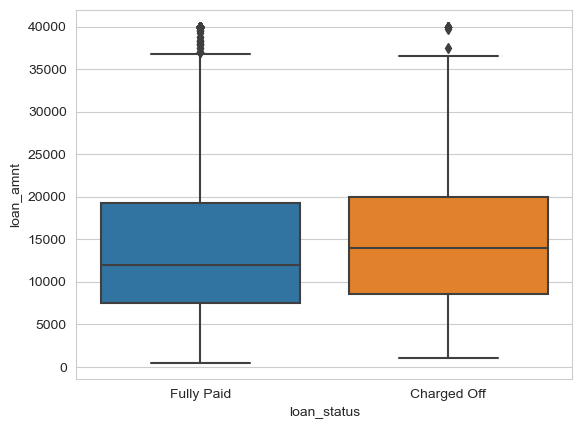

In [22]:
sns.boxplot(x="loan_status",y="loan_amnt",data=data)

**Summary statistics for the loan amount, grouped by the loan_status.**

In [23]:
data.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns to find out the unique possible grades and subgrades?**

In [24]:
array= list(data["grade"].sort_values().unique())

In [25]:
array

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [26]:
sub_array= list(data["sub_grade"].sort_values().unique())

In [27]:
sub_array

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Countplot for grade and subgrades with hue of loan_status.**

<Axes: xlabel='grade', ylabel='count'>

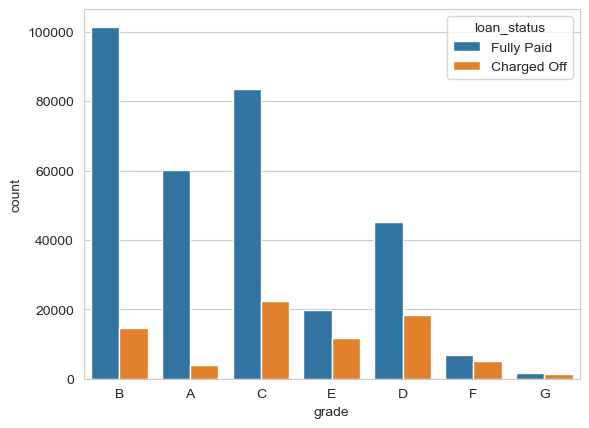

In [28]:
sns.countplot(x="grade", data= data, hue ="loan_status")

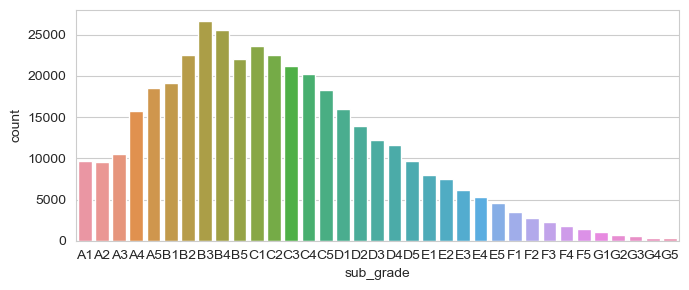

In [29]:
plt.figure(figsize=(7,3))
sns.countplot(x="sub_grade", data=data, order=sub_array)
plt.tight_layout()

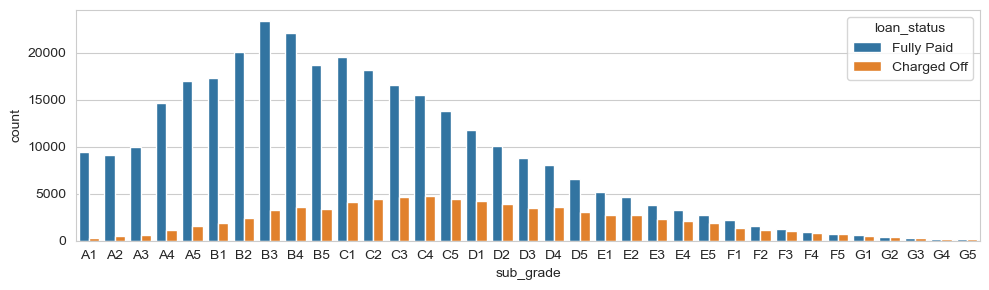

In [30]:
plt.figure(figsize=(10,3))
sns.countplot(x="sub_grade", data=data, hue="loan_status",order=sub_array)
plt.tight_layout()

**It looks like F and G subgrades are not visible properly and seems like they are not paid often hence plot count plot for subgroup F and G alone.**

In [31]:
points = sorted(data[(data["grade"] == "F")| (data["grade"] == "G")]["sub_grade"].unique())

<Axes: xlabel='sub_grade', ylabel='count'>

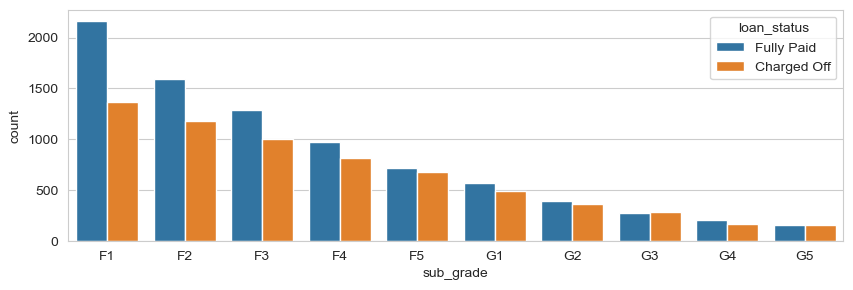

In [32]:
plt.figure(figsize=(10,3))
sns.countplot(x="sub_grade", data= data, order=points, hue="loan_status")

**Now we should look for the important feature variable and for that we must convert loan_status into numerical data. for that we will create a new column'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [33]:
data["loan_repaid"] = data["loan_status"].map({"Fully Paid":1,"Charged Off":0})

**Correlation of loan_repaid with other numerical feature variables sorted in negative to positive correlation**

<Axes: >

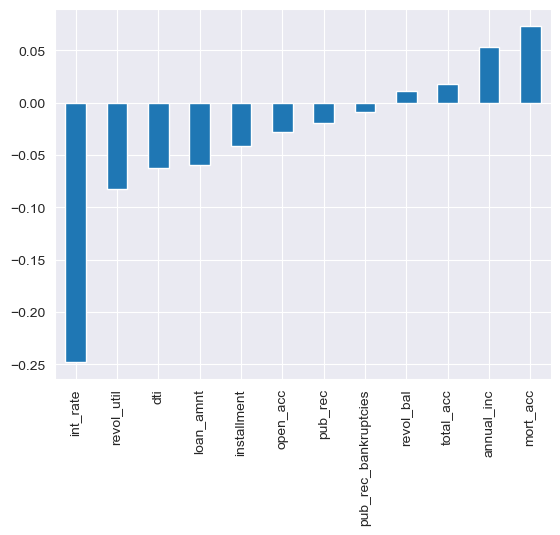

In [35]:
sns.set_style("darkgrid")
data.corr(numeric_only="bool")["loan_repaid"][:-1].sort_values().plot(kind="bar")

**Further visualising the plots of different features with hue of loan_repaid.**

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

/Users/akshayshendre/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/akshayshendre/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


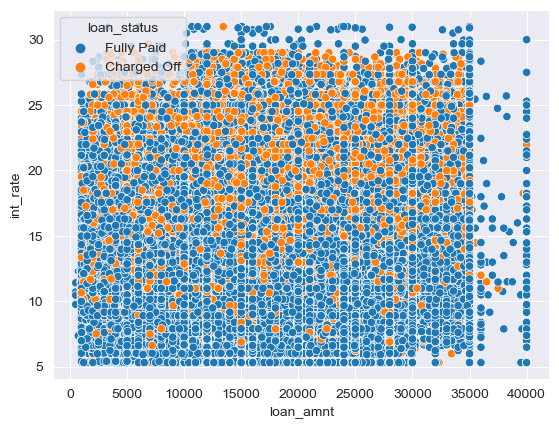

In [36]:
sns.scatterplot(y="int_rate", x="loan_amnt",hue="loan_status",data=data)

In [37]:
data["annual_inc"].max()

8706582.0

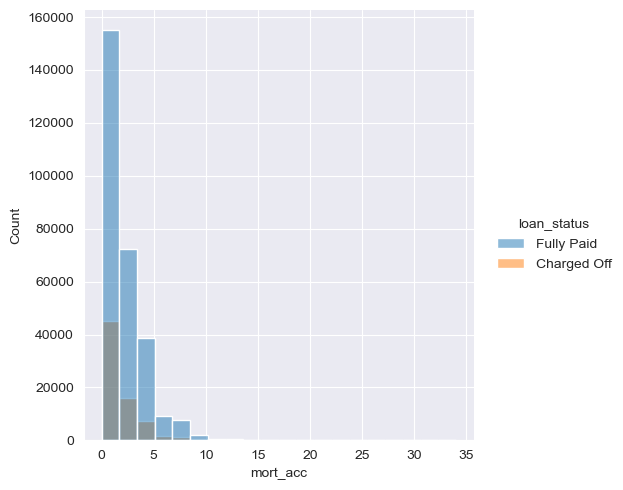

In [38]:
sns.displot(x='mort_acc', data=data,bins=20, hue="loan_status")

---

# Data PreProcessing

**After visualising the data in this section we will try to deal with the missing data, remove unnecessary or repetitive features and will perform some feature engineering to convert categorical data into numerical form accordingly.**

---

In [39]:
df = data.copy()

In [40]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns.**

In [41]:
print(len(df))

396030


**Total count of missing values per column.**

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Converting in term of percentage of the total DataFrame**

In [43]:
100*(df.isnull().sum()/len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**As we can see the highest percent of feature with missing values is 5.7 and 4.6% for emp_title and emp_length.**

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [44]:
# first let's check the discription of the columns using info function

print(info("emp_title"))
print("\n")
print(info("emp_length"))

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Number of unique employment job titles?**

In [45]:
df["emp_title"].nunique()

173105

In [46]:
df["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**There are too many unique job titles to try to convert this to a dummy variable feature. Hence we will move on to remove that emp_title column.**

In [47]:
df.drop("emp_title", axis=1,inplace=True)

In [48]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


**The 'emp_length' feature column.**

In [49]:
df["emp_length"].nunique()

11

In [50]:
sort= df["emp_length"].value_counts().sort_values(ascending=False)
sort

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

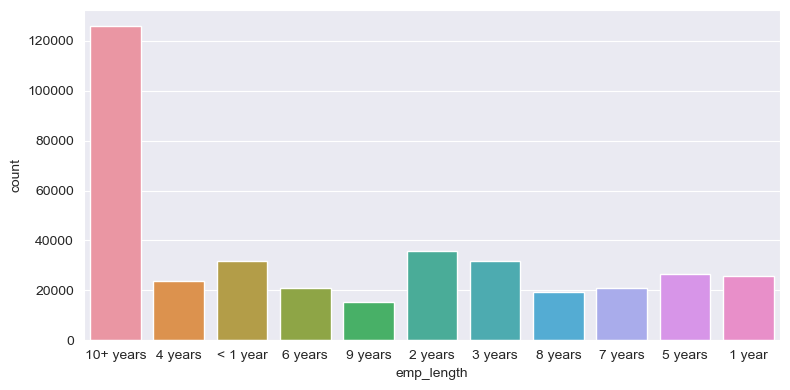

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(x="emp_length", data=df)
plt.tight_layout()

**The countplot with a hue of loan_status**

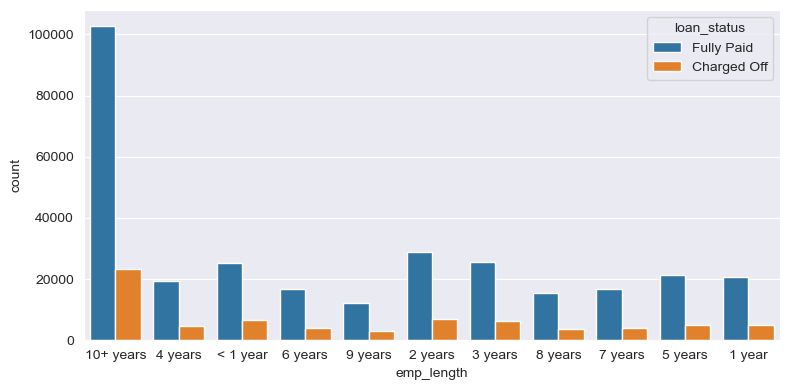

In [52]:
plt.figure(figsize=(8,4))
sns.countplot(x="emp_length", data=df, hue="loan_status")
plt.tight_layout()

**This still doesn't really informs if there is a strong relationship between employment length and being charged off, hence we want the percentage of charge offs per category. This will tell us the percent of people per employment category didn't pay back their loan.**

In [53]:
a = df[df["loan_status"]=="Fully Paid"]["emp_length"].value_counts()

In [54]:
b= df[df["loan_status"]=="Charged Off"]["emp_length"].value_counts()

In [55]:
c= b/a

In [56]:
c

1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: emp_length, dtype: float64

<Axes: >

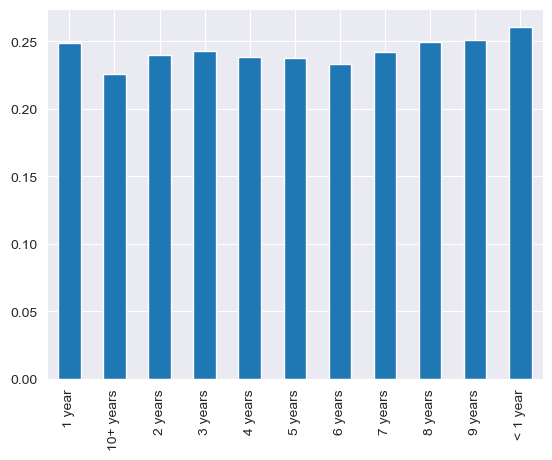

In [57]:
c.plot(kind="bar")

<Axes: >

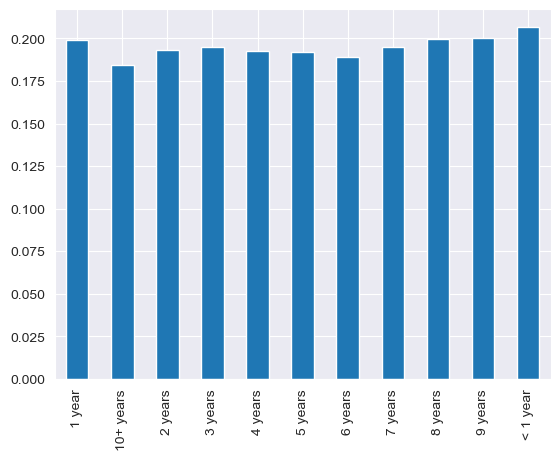

In [58]:
d= df["emp_length"].value_counts()
e= b/d
e.plot(kind="bar")

**Charge off rates are extremely similar across all employment lengths hence we will drop the emp_length column.**

In [59]:
df.drop("emp_length",axis=1,inplace=True)

In [60]:
df.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified
issue_d,Jan-2015,Jan-2015,Jan-2015,Nov-2014,Apr-2013


**Again revisiting the DataFrame to see what feature columns still have missing data.**

In [61]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

<Axes: >

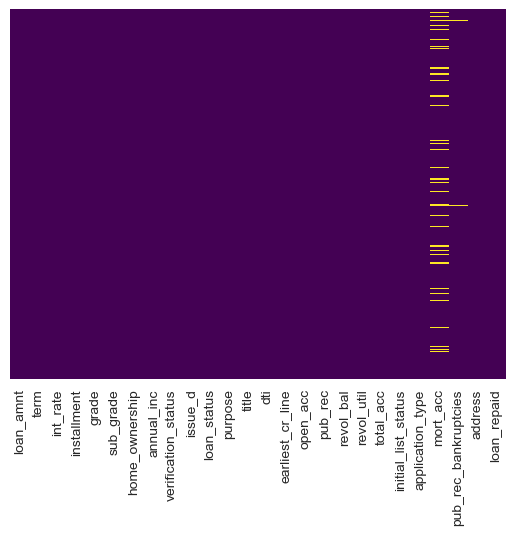

In [62]:
sns.heatmap(df.isnull(), cmap="viridis", yticklabels=False,cbar=False )

**The purpose & title column**

In [63]:
list(df["purpose"].unique())

['vacation',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'other',
 'medical',
 'wedding',
 'car',
 'moving',
 'house',
 'educational',
 'renewable_energy']

In [64]:
list(df["title"].unique())

['Vacation',
 'Debt consolidation',
 'Credit card refinancing',
 'Credit Card Refinance',
 'Home improvement',
 'No More Credit Cards',
 'Debt Consolidation',
 'Business',
 'Major purchase',
 'Debt Consolidation/Home Repairs',
 'kawasaki jetski',
 'Medical and Post Graduate Education Expenses',
 'Credit card debt',
 'concolidation',
 'Consolidation Loan',
 'Consolidate debt',
 'Pay Off Credit Card',
 'Cover',
 'Making a difference',
 'Debt Consalidation',
 'Thank you for your help!',
 'Medical expenses',
 'debt consolidation',
 'Other',
 'Dental Work',
 'Dept Consolodation/Home Improvement',
 'Want to be debt free in "3"',
 'Moving Forward',
 'Bills',
 'Honost Consolidation',
 'home expenses',
 'Pay the Bills',
 'Debt Loan',
 'Car financing',
 'Moving and relocation',
 'Home buying',
 'credit card refinance loan',
 'Moving Payoff',
 'Small Business Loan - Gourmet Food Truck',
 'consolidation loan',
 'first loan',
 'Personal',
 'Consolidation',
 'Loan',
 'The trailer',
 'Fiscal Responsi

In [65]:

df["title"].nunique()

48817

**The title column is simply a string subcategory of the purpose column.Hence we will drop the title column.**

In [66]:
df.drop("title",axis=1,inplace=True)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [68]:
print(info("mort_acc"))

Number of mortgage accounts.


**The 'mort_acc' columns**

In [69]:
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [70]:
df.corr(numeric_only="bool")["mort_acc"].sort_values()[:-1]

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

**We can observe that the 'total_acc' feature correlates with the 'mort_acc' upto a significant extinct. We will use 'total_acc' to fill the missing values in 'mort_acc' using fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [71]:
df["total_acc"].unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

In [72]:
array = df.groupby("total_acc")["mort_acc"].mean()

In [73]:
array

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [74]:
df["mort_acc"].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [75]:
df["mort_acc"]

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [76]:
def fill(col):
    mort_acc = col[0]
    total_acc = col[1]
    if np.isnan(mort_acc):
        return array[total_acc]
    else:
        return mort_acc

In [77]:
df["mort_acc"] = df[["mort_acc","total_acc"]].apply(fill, axis=1)

In [78]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [79]:
df["mort_acc"]

0         0.000000
1         3.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.358013
Name: mort_acc, Length: 396030, dtype: float64

**Further 'revol_util' and the 'pub_rec_bankruptcies' have missing data points, but they account for less than 0.5% of the total data. Hence we will go ahead and remove the rows that are have missing values for 'revol_util' and the 'pub_rec_bankruptcies'.**

In [80]:
df.dropna(inplace=True)

In [81]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

--- 
## Categorical Variables and Dummy Variables

**Now that we're done working with the missing data, we will perform some feature engineering to deal with the categorical columns and convert them into usable data form.**

---

In [82]:
df.select_dtypes(include=object).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

In [83]:
df["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [84]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [85]:
def term_c(obj):
    l= obj.split()
    return int(l[0])

In [86]:
df['term'] = df["term"].apply(term_c)

In [87]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

### grade feature

**We know that grade is part of sub_grade, so we will just drop the grade feature.**

In [88]:
df.drop("grade", axis=1, inplace=True)

In [89]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**Converting the subgrade into dummy variables.**

In [90]:
new_df = pd.get_dummies(df["sub_grade"], drop_first=True)

In [91]:
df= pd.concat([df,new_df], axis=1)

In [92]:
df.drop("sub_grade",axis=1,inplace=True)

In [93]:
df.select_dtypes(include=object).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [94]:
df[['verification_status', 'application_type','initial_list_status','purpose']].head()

,verification_status,application_type,initial_list_status,purpose
0,Not Verified,INDIVIDUAL,w,vacation
1,Not Verified,INDIVIDUAL,f,debt_consolidation
2,Source Verified,INDIVIDUAL,f,credit_card
3,Not Verified,INDIVIDUAL,f,credit_card
4,Verified,INDIVIDUAL,f,credit_card


In [95]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [96]:
df.select_dtypes(["object"]).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### home_ownership
**Review the value_counts for the home_ownership column.**

In [97]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Convert 'home_ownership' to dummy variables, but replace NONE and ANY with OTHER, so that we have just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

In [98]:
def fun(string):
    if string == 'NONE' or string=='ANY':
        return 'OTHER'
    else:
        return string

In [99]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: fun(x))

In [100]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [101]:
dummies = pd.get_dummies(df["home_ownership"], drop_first=True)

In [102]:
df = pd.concat([df.drop("home_ownership", axis=1), dummies], axis=1)

In [103]:
df.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


### 'address' columns
**Feature engineering zip code column from the address in the data set. Creating a column 'zip_code' that extracts the zip code from the address column.**

In [104]:
df["address"].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [105]:
def zip(add):
    zipcode = add.split()
    return int(zipcode[-1])

In [106]:
zip('0174 Michelle Gateway\nMendozaberg, OK 22690')

22690

In [107]:
df['zipcode'] = df["address"].apply(lambda x: zip(x))

In [108]:
df["zipcode"].head()

0    22690
1     5113
2     5113
3      813
4    11650
Name: zipcode, dtype: int64

In [109]:
df.zipcode.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

**Now coonverting this zip_code column into dummy variables.**

In [110]:
dummy = pd.get_dummies(df["zipcode"], drop_first=True)
df = pd.concat([df,dummy],axis=1)

### Column 'issue_d '

**We wouldn't have an issue_date unless a loan is issued, hence we will drop this feature.**

In [111]:
df.issue_d.head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [112]:
df.drop("issue_d",axis=1,inplace=True)

### Column 'earliest_cr_line'
**It looks like this columns elements are historical time stamp feature. hence we will go ahead to extract the year from this feature and then convert it to a numeric feature.**

In [113]:
df["earliest_cr_line"].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [114]:
def year(time):
    year = time.split('-')
    return int(year[-1])

In [115]:
year('Jun-1990')

1990

In [116]:
df["earliest_cr_year"] = df["earliest_cr_line"].apply(lambda x: year(x))

In [117]:
df.earliest_cr_year.head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64

In [118]:
df.drop("earliest_cr_line",axis=1,inplace=True)

In [119]:
df.select_dtypes([object]).columns

Index(['loan_status', 'address'], dtype='object')

In [120]:
df.drop("address",axis=1,inplace=True)

## Train Test Split

**Importing train_test_split from sklearn.**

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
df1 = df.copy()

In [123]:
len(df)

395219

**Drop 'loan_status' as 'loan_repaid' are essentially the same**

In [124]:
df1.drop("loan_status", axis =1, inplace=True)

In [125]:
df2=df1.sample(frac=0.1,random_state=101)

In [126]:
X = df2.drop("loan_repaid",axis=1).values

In [127]:
y= df2["loan_repaid"].values

In [128]:
len(y)

39522

In [129]:
len(df2)

39522

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

**Scaling the dataset**

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
prepross = MinMaxScaler()

In [133]:
X_train = prepross.fit_transform(X_train)
X_test = prepross.fit_transform(X_test)

**Importing modules and libraries for deep learning models**

In [134]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import  max_norm

2023-06-16 13:58:56.693608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [135]:
model = Sequential()
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [136]:
model.fit(x=X_train,y=y_train, epochs=25, batch_size=256, validation_data=(X_test,y_test), verbose=1)

Epoch 1/25
124/124 [==============================] - 3s 6ms/step - loss: 0.4497 - val_loss: 0.3185
Epoch 2/25
124/124 [==============================] - 0s 4ms/step - loss: 0.3167 - val_loss: 0.2813
Epoch 3/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2885 - val_loss: 0.2786
Epoch 4/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2794 - val_loss: 0.2771
Epoch 5/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2754 - val_loss: 0.2750
Epoch 6/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2734 - val_loss: 0.2749
Epoch 7/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2710 - val_loss: 0.2881
Epoch 8/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2678 - val_loss: 0.2729
Epoch 9/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2670 - val_loss: 0.2805
Epoch 10/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2650 - val_loss: 0.2825

In [137]:
from tensorflow.keras.models import load_model

In [138]:
model.save("model.h5")

In [139]:
losses = pd.DataFrame(model.history.history)

**Plotting plot for loss and val_loss**

<Axes: >

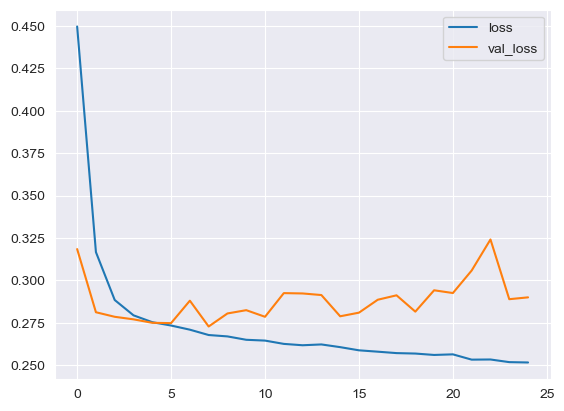

In [140]:
losses[['loss',"val_loss"]].plot()

In [141]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [142]:
predictions = model.predict(X_test)

248/248 [==============================] - 0s 1ms/step


In [143]:
predictions = np.where(predictions > 0.5,1,0)

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63      1570
           1       0.89      0.95      0.92      6335

    accuracy                           0.87      7905
   macro avg       0.81      0.75      0.77      7905
weighted avg       0.86      0.87      0.86      7905



In [145]:
confusion_matrix(y_test,predictions)

array([[ 864,  706],
       [ 321, 6014]])

In [146]:
print(accuracy_score(y_test,predictions))

0.8700822264389627


**We have achieved an impressive accuracy of 87% using our feature engineering and deep learning model approach.**